In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# Register converters to handle dates correctly
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(r"F:\analisis\localperfume\fcc-forum-pageviews.csv", index_col='date', parse_dates=True)

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# Access the date from the index
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime

# Clean data (no need to convert 'date' column again since it's now the index)
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# Extract year and month from the index
df['year'] = df.index.year
df['month'] = df.index.month  # Month as integer (1-12)
df['month_name'] = df.index.month_name()  # Month name (e.g., January)

# The rest of your code remains unchanged

def draw_line_plot():
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the data
    ax.plot(df.index, df['value'], color='blue', label='Page Views')
    
    # Set the title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save image and return fig
    fig.savefig('line_plot.png')
    return fig  # Ensure this returns the figure object


def draw_bar_plot():
    # Group by year and month to calculate the average page views
    df_bar = df.groupby(['year', 'month'])['value'].mean().reset_index()
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(x='month', y='value', hue='year', data=df_bar)
    
    # Set the month labels
    month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
    bar_plot.set_xticklabels(month_labels)
    
    # Show the plot
    plt.title('Average Page Views per Month by Year')
    plt.xlabel('Month')
    plt.ylabel('Average Page Views')
    plt.legend(title='Year')
    plt.show()

def draw_box_plot():
    # Create a new DataFrame for box plots
    df_box = df.copy()

    # Access the month directly from the index
    df_box['month'] = df_box.index.month  # Use month as numerical value for the box plot

    # Create a box plot
    plt.figure(figsize=(30, 6))
    ax1 = plt.subplot(1, 2, 1)
    sns.boxplot(x='month', y='value', data=df_box, ax=ax1)
    
    # Set the month labels for box plot
    month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
    ax1.set_xticklabels(month_labels)
    ax1.set_title('Box Plot of Page Views by Month')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Page Views')
    
    plt.show()


# Uncomment to run your functions
#

C:\Users\sagir\AppData\Local\Temp\ipykernel_16968\3759288532.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(month_labels)


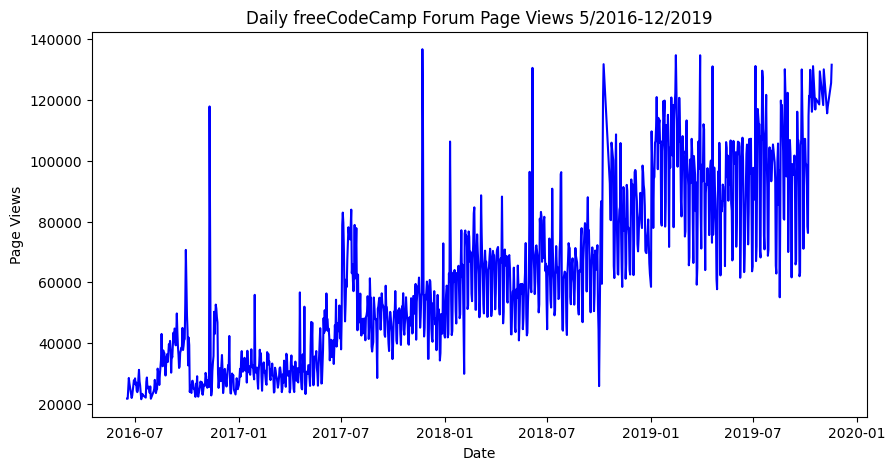

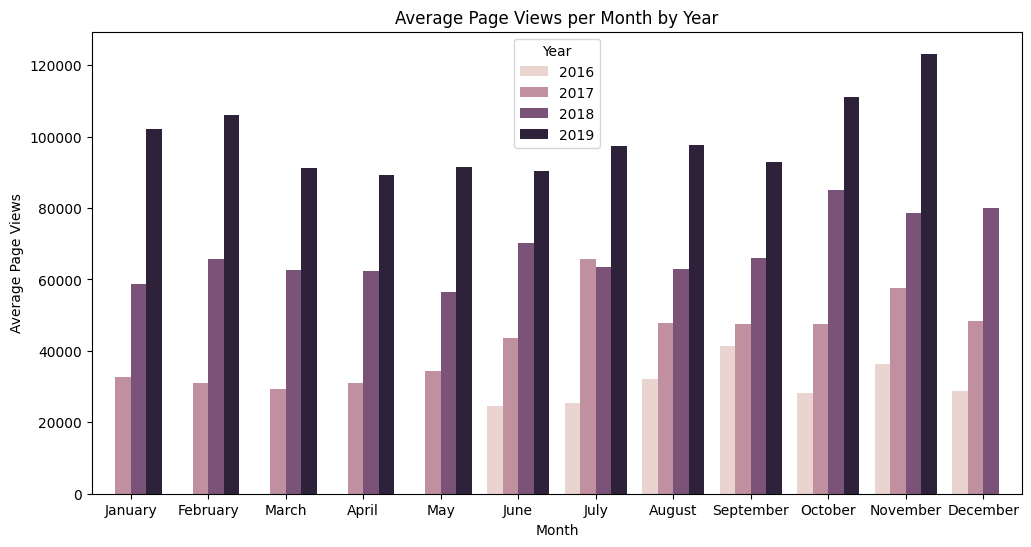

C:\Users\sagir\AppData\Local\Temp\ipykernel_16968\3759288532.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month_labels)


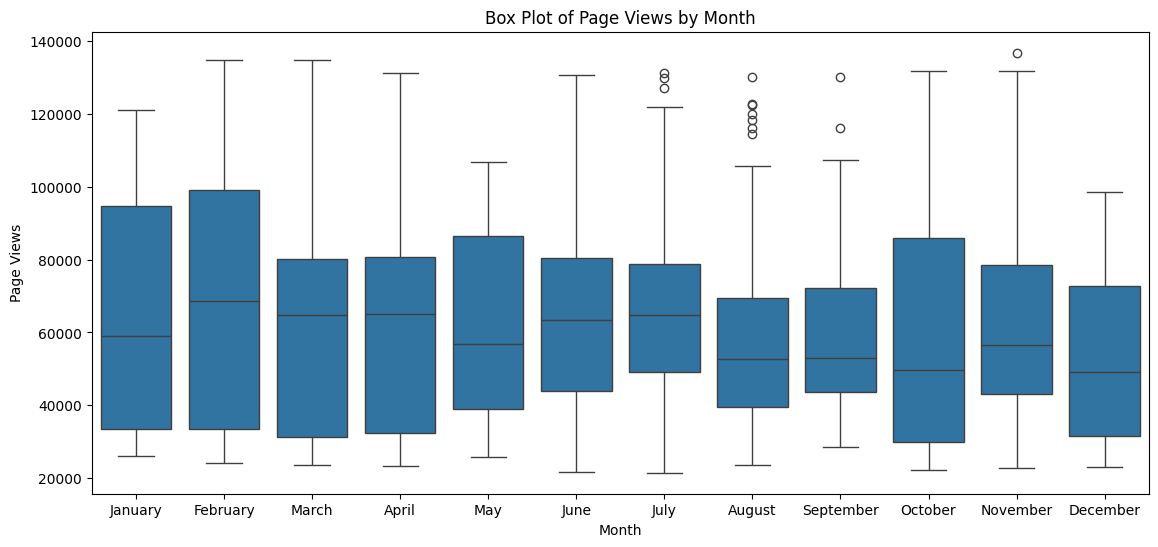

In [12]:
draw_line_plot()
draw_bar_plot()
draw_box_plot()